# Zahlen Voraussagen

In vielen Bereichen des Lebens sind wir mit der Vorhersage von Werten konfrontiert. Zum Beispiel: Wie viel Geld werde ich in einem Jahr gespart haben? Wie viele Stunden werde ich in diesem Jahr für die Schule lernen? Wie viele Punkte werde ich in der nächsten Klausur erreichen?

In der Schule sind wir häufig mit der Vorhersage von Noten konfrontiert. Zum Beispiel: Wie viele Punkte werde ich in der nächsten Prüfung erreichen, wenn ich X Stunden schlafe?

Dafür werden wir insbesondere die **lineare Regression** verwenden. Diese ist eine der einfachsten und am häufigsten verwendeten Methoden zur Vorhersage von Werten. Sie wird häufig in der Statistik und im maschinellen Lernen eingesetzt.

## Künstliche Intelligenz
*Intelligenz* (von lateinisch *intelligere*=erkennen, verstehen) kann auf unterschiedliche Weise definiert werden. Häufig wird Intelligenz definiert als die kognitive Fähigkeit, Probleme zu lösen. Dazu gehört auch die Vorhersage gewisser Werte (z.B.: Welches Video möchtest Du Dir als nächstes anschauen? Welche Route führt am schnellsten zum Ziel?).

Eine klassische Aufgabe der **künstlichen Intelligenz** besteht darin, für unbekannte Datenpunkte voraussagen zu treffen. Häufig beginnen Datenanalysen beim vergleich zweier Variablen, wie der folgenden:

<div style="display: flex; flex-direction: column; width:60%; margin-left: 20%; margin-right: 20%;">

![Beispielbild](../Images/schlafdauer_vs_notenschnitt.png)
</div>

Basierend auf diesen Daten könnte man eine Voraussage zu folgender Frage zu treffen versuchen: 

**Welche Note werde ich erreichen, wenn ich im Schnitt X Stunden schlafe?**

Damit eine Voraussage getroffen werden, müssen die Variablen in einem ungefähr linearen Zusammenhang stehen.

Die unabhängige Variable hier ist die Schlafdauer, die abhängige Variable die Note. Im Allgemeinen ist die abhängige Variable diejenige, die wir vorhersagen wollen. Die unabhängige Variable ist diejenige, die wir zur Vorhersage verwenden. In diesem Fall ist die Schlafdauer die unabhängige Variable und die Note die abhängige Variable.

## Lineare Regression
Die lineare Regression ist ein Verfahren zur Vorhersage einer abhängigen Variablen (z.B. Note) auf Basis einer unabhängigen Variablen (z.B. Schlafdauer). Dabei wird eine Gerade (lineare Funktion) durch die Datenpunkte gelegt, die den besten Fit (die beste "Passung") zu den Datenpunkten hat. Diese Gerade wird als Regressionsgerade bezeichnet.

## Aufbau dieser Aufgabe
Dieses Arbeitsblatt enthält einige fast schon fertige Python-Programme, die Sie ausführen können. Sie müssen nur kleine zusätzliche Teile hinzufügen, um die Programme zum Laufen zu bringen. Nachdem Sie die Programme ausgeführt haben, können Sie auf das Blatt `3b - Lineare Regression Übungen.ipynb` wechseln. Dort finden Sie einige Aufgaben, die Sie lösen können, um das Konzept der linearen Regression zu vertiefen.

Welches sind im obigen Beispiel:

- *Unabhängige* Variable?
- *Abhängige* Variable?

**Antwort**:
- *Unabhängige Variable*: Schlaf
- *Abhängige Variable*: Note

## Erste Schätzung

Als erstes laden wir einmal die Daten und schauen sie uns genau an.

In [1]:
# library pandas importieren (einmal pro Datei reicht)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # ggplot-Stil für Diagramme verwenden

In [3]:
# Datei einlesen und erste 5 Zeilen anzeigen
df = pd.read_csv("../Data/schlafdauer_vs_notenschnitt.csv")
df.head()

,Schlafdauer,Notenschnitt
0,9.436518,6.000000
1,6.082365,5.004316
2,6.207742,4.823140
3,5.390547,4.614907
4,8.298111,6.000000


Es ist immer hilfreich, sich die Daten anzuschauen, um ein Gefühl für die Verteilung zu bekommen. Erstellen Sie ein Streudiagramm, um die Beziehung zwischen den Variablen zu visualisieren. Verwenden Sie dazu die Methode `scatter` von `matplotlib.pyplot`. Visualisieren Sie die Spalten `schlafdauer` und `notenschnitt` aus dem DataFrame `df`.

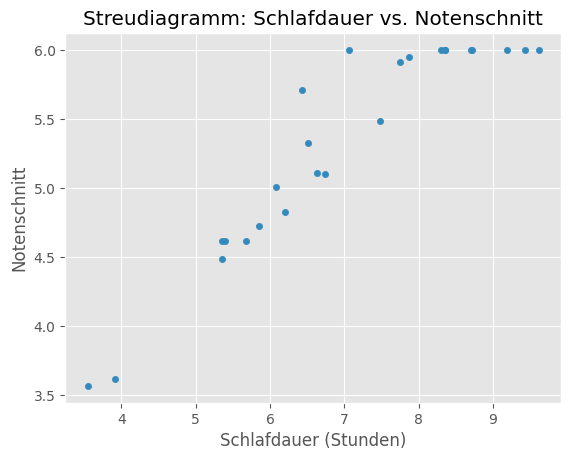

In [6]:
df.plot.scatter(x="Schlafdauer", y="Notenschnitt", title="Streudiagramm: Schlafdauer vs. Notenschnitt")
plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.show()


Sie möchten wissen, wie viele Stunden Sie schlafen müssen, um einen Notenschnitt von 5.5 zu erreichen. Eine erste Idee könnte sein, den kleinsten mit dem grössten Datenpunkt zu verbinden, um mit einer Geraden eine Vorhersage für eine Note von 5.5 zu machen:

In [7]:
# Werte für die kürzeste und längste Schlafdauer auslesen
df[(df['Schlafdauer']==df['Schlafdauer'].min()) | (df['Schlafdauer']==df['Schlafdauer'].max())].round(2)

# Wir erhalten also folgende Werte:

,Schlafdauer,Notenschnitt
5,3.55,3.57
6,9.62,6.00


### Aufgabe

Leiten Sie für die Schlafdauer (x-Achse) und den Notenschnitt (y-Achse) eine lineare Funktion her, welche die beiden Datenpunkte verbindet.

*Tipp*: Tipp: Die Formel zur Berechnung der Steigung einer linearen Funktion, welche die Punkte $(x_1, y_1)$ und $(x_2, y_2)$ verbindet, lautet $m = \frac{y_2 - y_1}{x_2 - x_1}$. Die Formel zur Berechnung des y-Achsenabschnitts lautet $q = y_1 - m \cdot x_1$.

In [8]:
# Werte für die minimale und maximale Schlafdauer und die zugehörigen Notenschnitte bestimmen
x1 = df["Schlafdauer"].min()
y1 = df[df["Schlafdauer"] == x1]["Notenschnitt"].values[0]
x2 = df["Schlafdauer"].max()
y2 = df[df["Schlafdauer"] == x2]["Notenschnitt"].values[0]

# Steigung m berechnen
m = (y2 - y1) / (x2 - x1)

# Achsenabschnitt q berechnen
q = y1 - m * x1

# Ausgabe zur Kontrolle
print(f"Steigung (m): {m}, Achsenabschnitt (q): {q}")

Steigung (m): 0.4009625087389924, Achsenabschnitt (q): 2.1438562854407324


Welche Note können Sie bei durchschnittlich 8 Stunden Schlaf erwarten? speichern Sie Ihr Resultat in `y_pred` (Bedeutung: "y predicted", also der vorhergesagte y-Wert)

Die Formel zur Vorhersage eines Punkts y (bei gegebenen x, m und q) lautet:
$$ y = m * x + q$$

In [9]:
y_pred = m * 8 + q
print(y_pred)

5.351556355352672


Folgende Grafik zeichnet die Punkte und ihre Regressionslinie mit den Variablen `m` und `q` ein, welche Sie berechnet haben. Zudem ist ihre Schätzung `y_pred` mit einem speziellen Marker eingezeichnet.

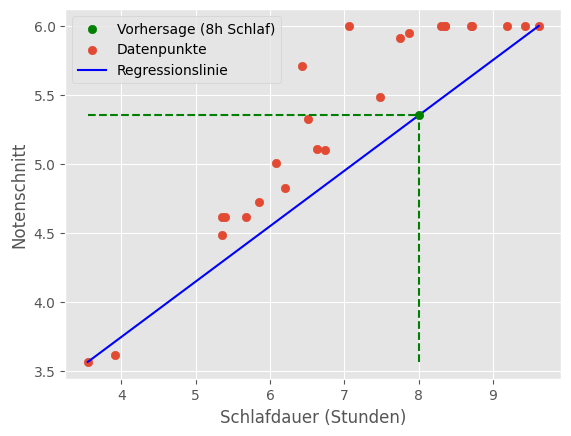

In [10]:
# Punkt bei x=8, y=y_pred einzeichnen
plt.scatter(8, y_pred, color="green", label="Vorhersage (8h Schlaf)", zorder=5)

# Horizontale Linie von Marker zur y-Achse
plt.hlines(y=y_pred, xmin=df["Schlafdauer"].min(), xmax=8, colors="green", linestyles="dashed")
plt.vlines(x=8, ymax=y_pred, ymin=df["Notenschnitt"].min(), colors="green", linestyles="dashed")


# Scatter plot zeichnen und Regressionslinie basierend auf m und q einzeichnen
plt.scatter(df["Schlafdauer"], df["Notenschnitt"], label="Datenpunkte")

# Linie zeichnen basierend auf m und q
x_values = [df["Schlafdauer"].min(), df["Schlafdauer"].max()]
y_values = [m * x + q for x in x_values]
plt.plot(x_values, y_values, color="blue", label="Regressionslinie")

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.legend()

Wie wir sehen, folgt die Linie nicht allzu schlecht den Daten.

Sie verwenden diese Linie, um vorherzusagen, was ihre Note sein wird, wenn sie x Stunden schlafen. Sie stellen jedoch fest, dass sie immer etwas danebenliegen. Ist ihre Note in echt besser oder schlechter als Ihre Vorhersage?

**Antwort**: Man wird in echt eher eine bessere Note schreiben.

 ## Genauigkeit und Fehler einer linearen Vorhersage
 Im folgenden Abschnitt wollen wir uns anschauen, wie man die Qualität einer linearen Vorhersage (wie wir sie soeben gemacht haben) messen kann. 

Dafür wählen wir als erstes drei beliebige Datenpunkte aus. 
Mit dem Befehl `df.iloc[...]` können die Daten mit einer Liste von Index-Werten ausgewählt werden.

Danach zeichnen wir eine Linie vom kleinsten Schlafwert zum grössten Schlafwert (rot) sowie die Abweichung von der Linie (grün).

Den untenstehenden Code müssen Sie nicht im Detail verstehen.

</div>

    Schlafdauer  Notenschnitt
3      5.390547      4.614907
18     7.063321      6.000000
19     7.874223      5.952354


Text(0.5, 1.0, 'Streudiagramm mit Regressionslinie und Unterschied')

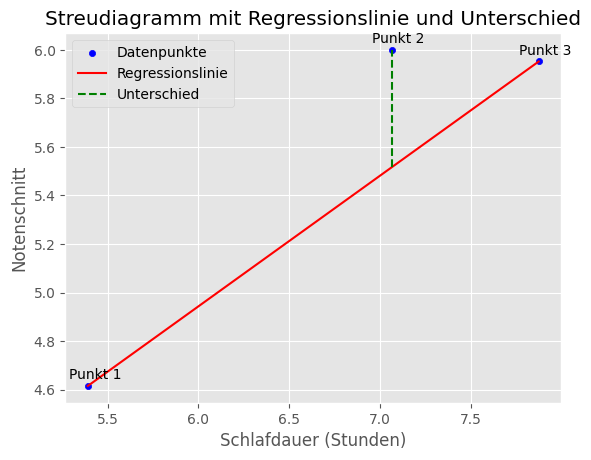

In [12]:
# Drei beliebige Zeilen auswählen und in einem neuen DataFrame speichern
df_sample = df.iloc[[3, 18, 19]]
print(df_sample) # Ausgabe der drei Zeilen

# Streudiagramm für df_sample erstellen
df_sample.plot.scatter(x="Schlafdauer", y="Notenschnitt",
                       color="blue", label="Datenpunkte")

# Regressionslinie zwischen minimaler und maximaler Schlafdauer zeichnen
x_min_max = [df_sample["Schlafdauer"].iloc[0], df_sample["Schlafdauer"].iloc[-1]]
y_min_max = [df_sample["Notenschnitt"].iloc[0], df_sample["Notenschnitt"].iloc[-1]]

# berechne Regressionsparameter m und q
m = (y_min_max[1] - y_min_max[0]) / (x_min_max[1] - x_min_max[0])
q = y_min_max[0] - m * x_min_max[0]

# Linie zeichnen basierend auf m und q
x_values = [x_min_max[0], x_min_max[1]]
y_values = [m * x + q for x in x_values]
plt.plot(x_values, y_values, color="red", label="Regressionslinie")

# Punkte beschriften
for i, (x, y) in enumerate(zip(df_sample["Schlafdauer"], df_sample["Notenschnitt"])):
    plt.annotate(f"Punkt {i+1}", (x, y), textcoords="offset points", xytext=(5, 5), ha="center")

# Mittlerer Punkt
middle_point = df_sample.iloc[1]
middle_x = middle_point["Schlafdauer"]
middle_y = middle_point["Notenschnitt"]

# Vorhergesagter y-Wert auf der Regressionslinie für den mittleren Punkt
predicted_y = y_min_max[0] + (y_min_max[1] - y_min_max[0]) * \
    ((middle_x - x_min_max[0]) / (x_min_max[1] - x_min_max[0]))

# Vertikale Linie, die den Unterschied zeigt
plt.vlines(middle_x, ymin=predicted_y, ymax=middle_y,
           color="green", linestyle="dashed", label="Unterschied")

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.legend()
plt.title("Streudiagramm mit Regressionslinie und Unterschied")

In [13]:
# berechne die vorhergesagten Notenschnitte für die drei Punkte
df_sample["Vorhersage"] = m * df_sample["Schlafdauer"] + q
# berechne den Unterschied zwischen den tatsächlichen und vorhergesagten Notenschnitten
df_sample["Unterschied"] = df_sample["Notenschnitt"] - df_sample["Vorhersage"]
df_sample.round(2)

# Die Warnungen untenan können Sie ignorieren, da sie nur darauf hinweisen, dass wir eine neue Spalte in einem DataFrame erstellt haben.

/var/folders/2k/bqsl40yx6p7d5l_lccz2cdj40000gn/T/ipykernel_25359/2092563808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["Vorhersage"] = m * df_sample["Schlafdauer"] + q
/var/folders/2k/bqsl40yx6p7d5l_lccz2cdj40000gn/T/ipykernel_25359/2092563808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["Unterschied"] = df_sample["Notenschnitt"] - df_sample["Vorhersage"]


,Schlafdauer,Notenschnitt,Vorhersage,Unterschied
3,5.39,4.61,4.61,0.00
18,7.06,6.00,5.52,0.48
19,7.87,5.95,5.95,0.00


## Die Qualität der Regressionslinie messen

Die Qualität der Regressionslinie wird gemessen als die Summe der quadrierten Abweichungen von der Linie (s. Spalte `Unterschied` in der Ausgabe oben). Im obigen Beispiel weichen die Punkte 1 und 3 nicht von der Linie ab, ihre Abweichung ist also 0. Punkt 3 weicht jedoch um -0.484 ab. Die Summe der quadrierten Abweichungen ist also:

$$0^2+(-0.484)^2+0^2= 0.235$$

Diesen Wert gilt es zu minimieren, um eine bestmöglich passende Regressionslinie zu finden, also eine, die alle Punkte möglichst realitätsgetreu abbildet.

Die lineare Regression ist ein Verfahren, um eine Regressionslinie für zwei Variablen zu finden, so dass die Summe der quadrierten Abweichungen zwischen den tatsächlichen y-Werten und den vorhergesagten y-Werten minimiert wird. Die Formeln zur Berechnung der Regressionskoeffizienten m und q sind:

$$m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}$$

$$q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(wobei die obige Formel für m eingefügt wird)}$$

Eine vollständige Herleitung dieser Formeln finden Sie im Anhang dieses Aufgabenblatts.

Damit Sie diese Formeln nicht in Python umsetzen müssen, können Sie das Statistik-Paket `statsmodels` verwenden.m

<div class="alert alert-block alert-info">
<img align="right" src="Images/statsmodels.svg" alt="statsmodels" width="200" />
<strong>Neues Paket: statsmodels</strong>

Statsmodels ist eine leistungsstarke Python-Bibliothek, die eine breite Palette an statistischen Modellen und Testverfahren für die Datenanalyse bietet. Sie ermöglicht es Benutzern, statistische Modelle zu schätzen, statistische Tests durchzuführen und Datenexploration zu betreiben.
</div>

In [14]:
import statsmodels.formula.api as smf # statsmodels als smf importieren

Um aus den gegebenen Daten die Steigung $m$ sowie den Abchsenabschnitt $q$ zu berechnen, verwenden wir die Methode der kleinsten Quadrate (englisch *OLS*=**O**rdinary **L**east **S**quares).

Diese Methode minimiert die Summe der quadrierten Abweichungen zwischen den beobachteten Werten und den durch die Regressionsgerade vorhergesagten Werten und verwendet dazu die obige formel.

Wir können die OLS-Methode in Python mit der Bibliothek `statsmodels` und dem Befehl `smf.ols()` verwenden. Diese Methode erfordert eine Formel, die die abhängige und unabhängige Variable beschreibt, sowie die Daten, auf denen die Regression durchgeführt werden soll. Dabei wird das Gleichheitszeichen `~` verwendet, um die abhängige Variable von der unabhängigen Variable zu trennen. In diesem Fall ist die abhängige Variable `Notenschnitt` und die unabhängige Variable `Schlafdauer`. Die Formel lautet also `Notenschnitt ~ Schlafdauer`.

Mit dem Befehl `.fit()` (Modell an die Daten anpassen, d.h. Modell trainieren) wird die Regression durchgeführt und das Ergebnis in der Variablen `model` gespeichert. Schließlich können wir die Regressionsparameter mit `model.params` abrufen. Diese Methode gibt uns die Werte für den Achsenabschnitt (*Intercept*) und die Steigung (*Slope*) zurück.

In [15]:
lm = smf.ols(formula="Notenschnitt ~ Schlafdauer", data=df).fit() # Regressionsmodell erstellen
lm.params # gefundene Regressionsparameter ausgeben

Intercept      2.276667
Schlafdauer    0.434090
dtype: float64

Welche Variable oben entspricht dem Achsenabschnitt q und welche der Steigung m?

**Antwort**:
- *m*: Schlafdauer (Steigung)
- *q*: Intercept (Achsenabschnitt)

Um die Steigung und den Achsenabschnitt in zwei Variablen separat zu speichern, können Sie Folgendes tun:

In [16]:
# Steigung und Achsenabschnitt extrahieren
m = lm.params["Schlafdauer"]
q = lm.params["Intercept"]

# Diese Zeile nicht verändern
print(f"Steigung (m): {m}, Achsenabschnitt (q): {q}")

Steigung (m): 0.4340898794034307, Achsenabschnitt (q): 2.2766665874126915


Im Folgenden verwenden wir die Funktion `lm.predict()` um den Notenschnitt für eine Schlafdauer von 7.5 Stunden vorherzusagen:

In [17]:
s = pd.Series([7.5], name="Schlafdauer") # Vorhersage für 7.5 Stunden Schlaf 
lm.predict(s) # Vorhersage durchführen

0    5.532341
dtype: float64

Welche Note kann bei einer Schlafdauer von 7.5 Stunden erreicht werden?

**Antwort**: 5.53

Führen Sie die Zelle unten aus, um mit `matplotlib` die Datenpunkte und die Regressionsgerade zu zeichnen.
</div>

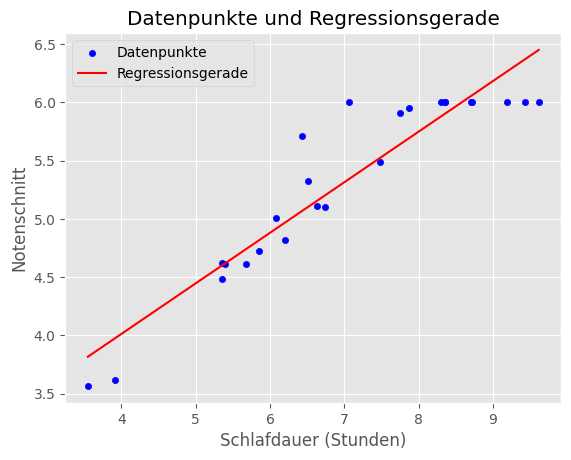

In [20]:
# Datenpunkte als Streudiagramm zeichnen
ax = df.plot.scatter(x="Schlafdauer", y="Notenschnitt", label="Datenpunkte", color="blue")

# Regressionsgerade berechnen und zeichnen
x_values = [df["Schlafdauer"].min(), df["Schlafdauer"].max()]
y_values = [m * x + q for x in x_values]# berechne  vorhergesagte y-Werte für kleinste und grösste Schlafdauer
plt.plot(x_values, y_values, color="red", label="Regressionsgerade")

plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.legend()
plt.title("Datenpunkte und Regressionsgerade")
plt.show()


## Appendix: Herleitung der Formeln für die einfache lineare Regression

### Definition der Zielfunktion
Das Ziel der linearen Regression besteht darin, die bestmögliche Gerade $y = mx + q$ zu finden, die die Summe der quadrierten Residuen zwischen den vorhergesagten Werten und den tatsächlichen Datenpunkten minimiert. Die Summe der quadrierten Abstände zwischen den Datenpunkten und der Geraden wird definiert als:
$$
S = \sum_{i=1}^n (y_i - (mx_i + q))^2
$$

### Partielle Ableitungen
Um $S$ zu minimieren, nehmen wir die partiellen Ableitungen bezüglich $m$ und $q$ und setzen diese gleich Null.

#### Partielle Ableitung nach $m$
$$
\frac{\partial S}{\partial m} = \frac{\partial}{\partial m} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-x_i)
$$
$$
= -2 \sum_{i=1}^n x_i(y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung:
$$
\sum x_iy_i - m\sum x_i^2 - q\sum x_i = 0
$$
$$
\sum x_iy_i = m\sum x_i^2 + q\sum x_i \quad \text{(Gleichung 1)}
$$

#### Partielle Ableitung nach $q$
$$
\frac{\partial S}{\partial q} = \frac{\partial}{\partial q} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-1)
$$
$$
= -2 \sum_{i=1}^n (y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung:
$$
\sum y_i - m\sum x_i - nq = 0
$$
$$
\sum y_i = m\sum x_i + nq \quad \text{(Gleichung 2)}
$$

### Lösung der Gleichungen
Aus Gleichung 2:
$$
q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(Gleichung 3)}
$$
Einsetzen der Gleichung 3 in Gleichung 1:
$$
\sum x_iy_i = m\sum x_i^2 + \left(\frac{\sum y_i - m\sum x_i}{n}\right)\sum x_i
$$
$$
\sum x_iy_i = m\sum x_i^2 + \frac{(\sum y_i)\sum x_i}{n} - \frac{m(\sum x_i)^2}{n}
$$
Auflösen nach $m$:
$$
m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$
Bestimmen von $q$ über Einsetzen von $m$ in Gleichung 3:
$$
q = \frac{\sum y_i - m\sum x_i}{n}
$$